Shahab Hamid DS06

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
house = pd.read_csv('house_prices.csv')
house

,area,bedrooms,bathrooms,floors,price
0,1360,2,1,2,75561.009869
1,4272,3,3,1,197449.640308
2,3592,1,2,1,180621.795096
3,966,1,2,2,45234.416477
4,4926,2,1,2,232342.452693
...,...,...,...,...,...
995,3261,4,1,2,164587.880099
996,3179,1,2,1,156818.403658
997,2606,4,2,1,135836.079275
998,4723,5,2,2,234621.268790


In [3]:
house.shape

(1000, 5)

In [4]:
house.loc[0:9]

,area,bedrooms,bathrooms,floors,price
0,1360,2,1,2,75561.009869
1,4272,3,3,1,197449.640308
2,3592,1,2,1,180621.795096
3,966,1,2,2,45234.416477
4,4926,2,1,2,232342.452693
5,3944,5,3,1,187987.324203
6,3671,1,2,1,182560.239077
7,3419,1,1,1,181389.632565
8,630,3,3,1,25070.420087
9,2185,4,2,2,121483.813999


In [5]:
house['price'].mean()

141138.78993588692

<Axes: ylabel='Density'>

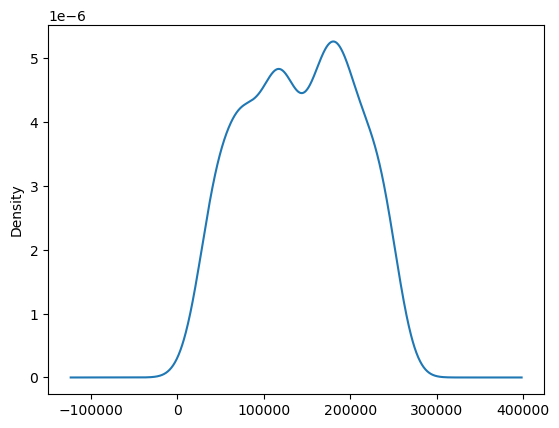

In [6]:
house['price'].plot(kind='kde')

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


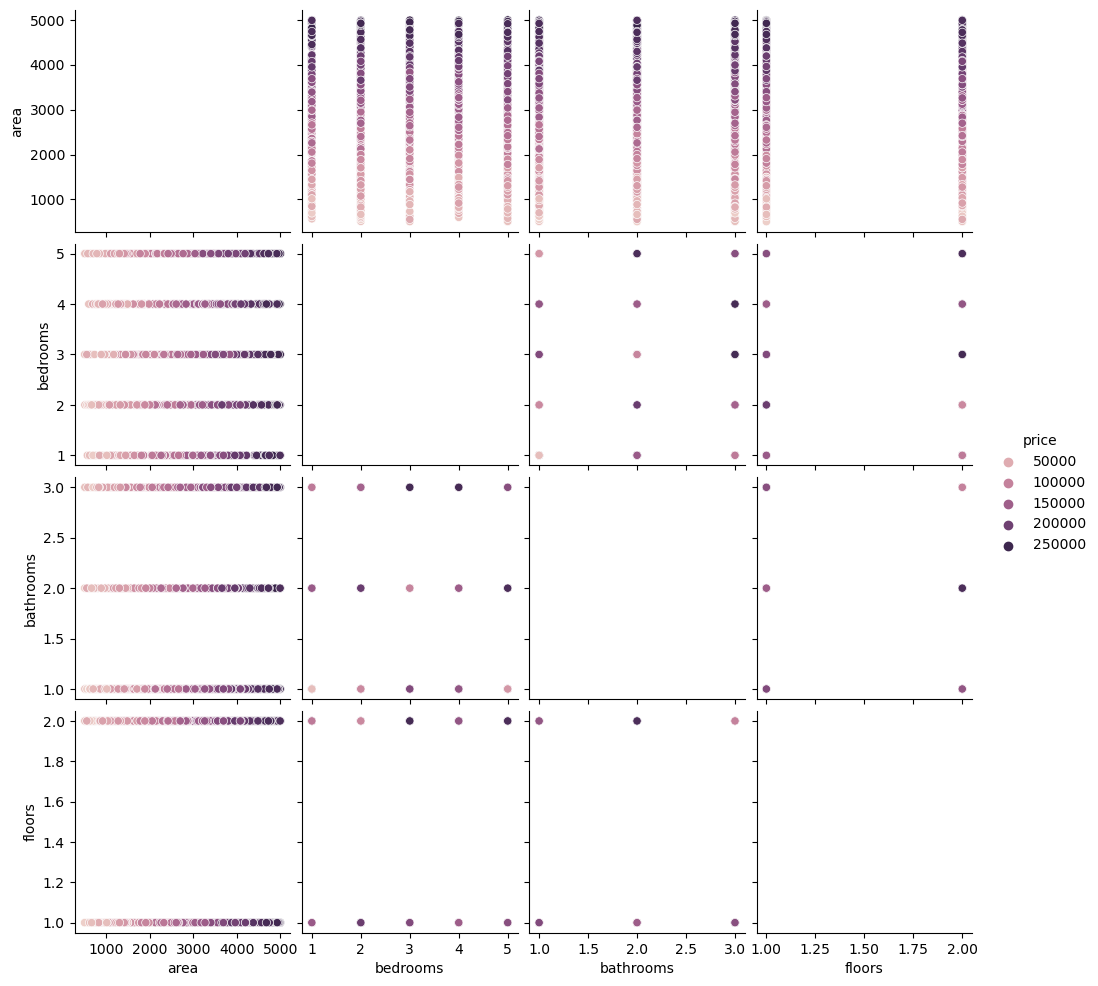

In [7]:
# Assuming you have a DataFrame named 'house'
# Selecting only numeric columns
numeric_columns = house.select_dtypes(include=['float64', 'int64']).copy()

# Create a pair plot with 'price' as the hue
sns.pairplot(numeric_columns, hue='price')
plt.show()

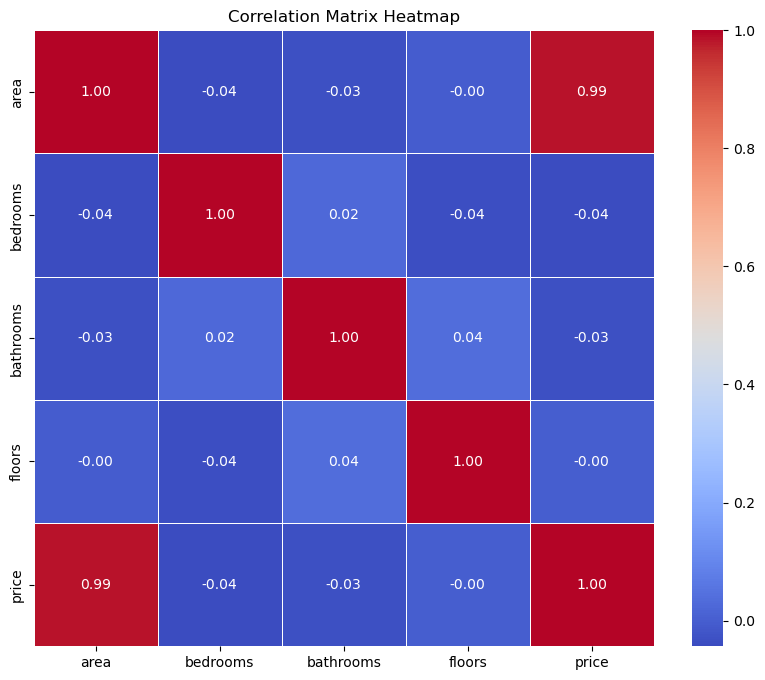

In [8]:
# Calculate the correlation matrix
correlation_matrix = house.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
# Check for missing values in each column
missing_values = house.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

# Display the total number of missing values
total_missing_values = missing_values.sum()
print(total_missing_values)

Series([], dtype: int64)
0


In [10]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the data
a = ['area', 'bedrooms', 'bathrooms', 'floors']
X_standardized = scaler.fit_transform(house[a])
X_standardized

array([[-1.15980323, -0.69383623, -1.18669921,  1.02224741],
       [ 1.16072443,  0.00700845,  1.25255918, -0.97823676],
       [ 0.61884297, -1.39468091,  0.03292999, -0.97823676],
       ...,
       [-0.16688515,  0.70785312,  0.03292999, -0.97823676],
       [ 1.52011933,  1.4086978 ,  0.03292999,  1.02224741],
       [ 0.36065239,  0.70785312,  0.03292999, -0.97823676]])

In [11]:
house['price_per_sqft'] = house['price'] / house['area']
house.head()

,area,bedrooms,bathrooms,floors,price,price_per_sqft
0,1360,2,1,2,75561.009869,55.559566
1,4272,3,3,1,197449.640308,46.219485
2,3592,1,2,1,180621.795096,50.284464
3,966,1,2,2,45234.416477,46.826518
4,4926,2,1,2,232342.452693,47.166556


In [12]:
X = house.drop(['price_per_sqft','price'], axis=1)  # Features excluding the target variable
y = house['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 4)
Shape of X_test: (200, 4)
Shape of y_train: (800,)
Shape of y_test: (200,)


Mean Squared Error: 93338124.83730526
R-squared: 0.9769526240478177


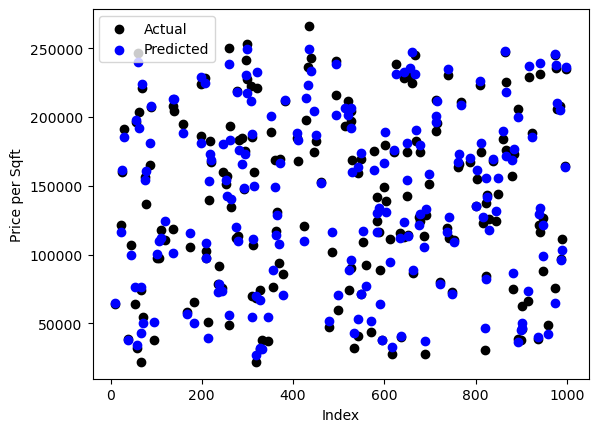

In [13]:
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the predictions against the actual values
plt.scatter(X_test.index, y_test, color='black', label='Actual')
plt.scatter(X_test.index, y_pred, color='blue', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price per Sqft')
plt.legend()
plt.show()


In [14]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Ridge Regression - Mean Squared Error:", ridge_mse)
print("Ridge Regression - R-squared:", ridge_r2)

print("Lasso Regression - Mean Squared Error:", lasso_mse)
print("Lasso Regression - R-squared:", lasso_r2)

Ridge Regression - Mean Squared Error: 93337448.11016625
Ridge Regression - R-squared: 0.9769527911476477
Lasso Regression - Mean Squared Error: 93336794.57790668
Lasso Regression - R-squared: 0.9769529525201169


In [15]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 93338124.83730526
Root Mean Squared Error (RMSE): 9661.165811500456
Mean Absolute Error (MAE): 7755.330146621514
R-squared (R2): 0.9769526240478177


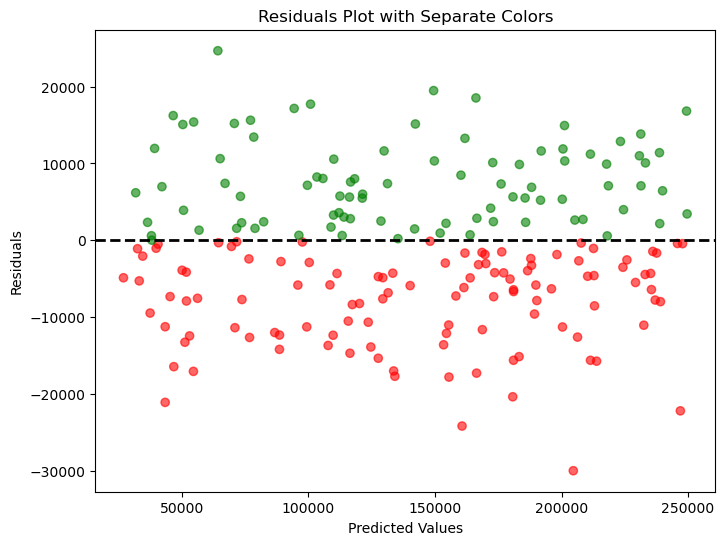

In [16]:
# Calculate residuals
residuals = y_test - y_pred
# Assign separate colors to positive and negative residuals
colors = ['green' if r >= 0 else 'red' for r in residuals]

# Create a residuals plot with separate colors
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, c=colors, alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.title('Residuals Plot with Separate Colors')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [17]:
# This residuals plot with separate colors makes it easy to visually identify 
# the direction and magnitude of errors (residuals) in your model predictions.
# Positive residuals are shown in green, and negative residuals are shown in red.

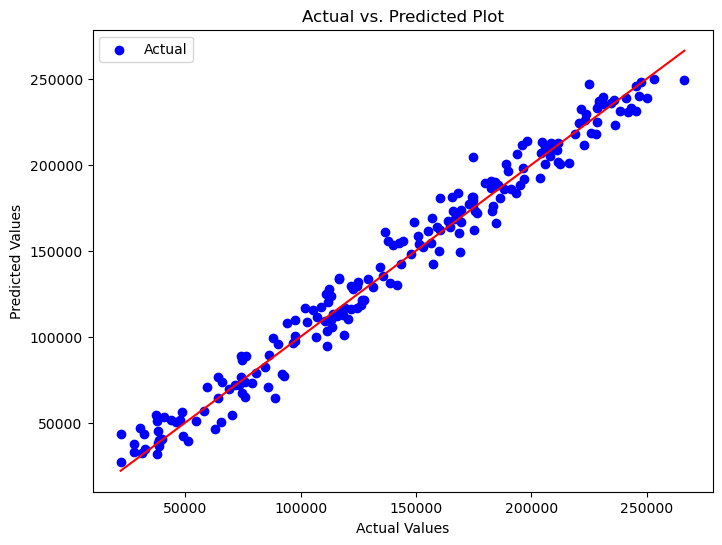

In [18]:
# Create an actual vs. predicted plot with separate colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual')  # Blue for actual values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')  # Diagonal line for reference
#plt.scatter(y_test, y_pred, color='green', label='Predicted', alpha=0.5)  # Green for predicted values with transparency
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [19]:
# This type of plot is useful for visually assessing how close your model predictions
# are to the actual values. Points close to the diagonal line indicate accurate predictions, 
# while deviations from the line suggest errors in your predictions. 
# The ideal line serves as a reference for perfect predictions.